<div style = "font-size: 23px"><b>
Data Science & Business Analytics Intern at The Sparks Foundation </b></div>
<br>
<div style = "font-size: 18px"><b><I>Task #1: Predict Scores using Supervised Machine Learning</b></I></div>
<br>
<div style="font-size: 18px"><b>Author : Umadevi Balasubramanian </b></div>

<b>Problem: Predict the percentage Scores of a student based on the no. of study hours.
Task : What will be predicted score if a student studies for 9.25 hrs/ day? </b>

<b>1. Loading the Dataset. </b>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Loading the Dataset from the given link.

url = "http://bit.ly/w-data"
mydata = pd.read_csv(url)

print("Data Loaded Successfully.\n")
mydata.head()   # Print the first 5 records.

Data Loaded Successfully.



,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


<b>2. Data Analysis - To Know about the Data.</b>

In [4]:
mydata.info()   # This gives info about No.of. columns, datatypes, missing info. There is no missing data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
mydata.describe()   # Statiscal information of the data.

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
mydata.corr(method = "pearson")   # Correlation among the columns.

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<b> The above result shows that there exists a Strong Positive Correlation between Hours and Scores. </b>

<b>3. Visualizing the Data. </b>

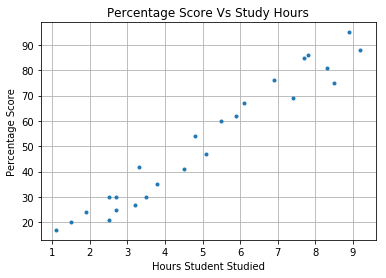

In [7]:
# To ensure linearity between Hours and Scores
# No Missing data, no irrelevent data, no outlier. So no data cleaning needed.

x = mydata['Hours'].values.reshape(-1,1)   # Our data is a 1-D array(scalar). Using reshape, converted as a 2-D Vector.
y = mydata["Scores"].values.reshape(-1,1)   # -1 means unknown.

plt.figure()
plt.title("Percentage Score Vs Study Hours")
plt.xlabel("Hours Student Studied")
plt.ylabel("Percentage Score")
plt.plot(x,y,'.')
plt.grid(True)
plt.show()

<b>The above Graph clearly shows that, there is a Positive Linear Relationship between the Number of Hours student 
studied & Percentage Scores got.</b>

<b>4. Data Preparation </b>

Dividing the data into <b>Training Set (80%) </b> and <b>Test Set (20%)</b>

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

<b>5. Build the Linear Regression Model, Training the Algorithm. </b>

In [9]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Training Completed with Score:", regressor.score(X_train, y_train))

Training Completed with Score: 0.9515510725211553


<b> Plotting the Regression Line </b>

Co-efficient: [[9.91065648]]
Intercept: [2.01816004]


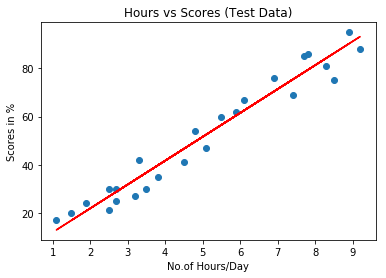

In [10]:
# Plotting the Regression Line (For Test data only)
m = regressor.coef_
c = regressor.intercept_

print("Co-efficient:", m)
print("Intercept:", c)

line = m * x + c

plt.scatter(x, y)
plt.plot(x, line, "red")
plt.title("Hours vs Scores (Test Data)")
plt.xlabel("No.of Hours/Day")
plt.ylabel("Scores in %")
plt.show()

<b>6. Make Predictions</b>

In [11]:
y_pred = regressor.predict(X_test)   # Predicting Scores for the X_test data.

# Actual Scores is available in y_test. So Now we are comparing y_test with y_pred.

df = pd.DataFrame({'Actual':y_test.flatten(), 'Predicted':y_pred.flatten()})
print(df)


   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


<b>7. Make Predictions for Hours = 9.25 Hrs/Day.</b>

In [12]:
hours = 9.25
result = regressor.predict([[hours]])


In [13]:
import sys
import numpy as np

np.savetxt(sys.stdout,result, fmt="Predicted Scores for 9.25 Hrs/Day is: %.5f")

Predicted Scores for 9.25 Hrs/Day is: 93.69173


<b>8. Model Interpretation <br> Our Linear Regression Model predicts that if the student spends 9.25 hrs/day,
in studies, he will get the Score of 93.69 %.</b>


<b>9. Evaluating The Model</b>

The final step is to evaluate the performance of the Algorithm. 
The metrics we are using here for evaluation are: <b>Mean squared Error & Mean Absolute Error </b> 
since we have only NUMERIC data.

In [14]:
from sklearn import metrics
print("Mean Absloute Error :", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error  :", metrics.mean_squared_error(y_test, y_pred) )

Mean Absloute Error : 4.183859899002975
Mean Squared Error  : 21.5987693072174


In [15]:
accuracy = regressor.score(X_test, y_test) *100
print("Accuracy of Our Model is: %.2f " %accuracy + "%")

Accuracy of Our Model is: 94.55 %
